# GARCH模型实现

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

These examples will all make use of financial data from Yahoo! Finance. This data set can be loaded from

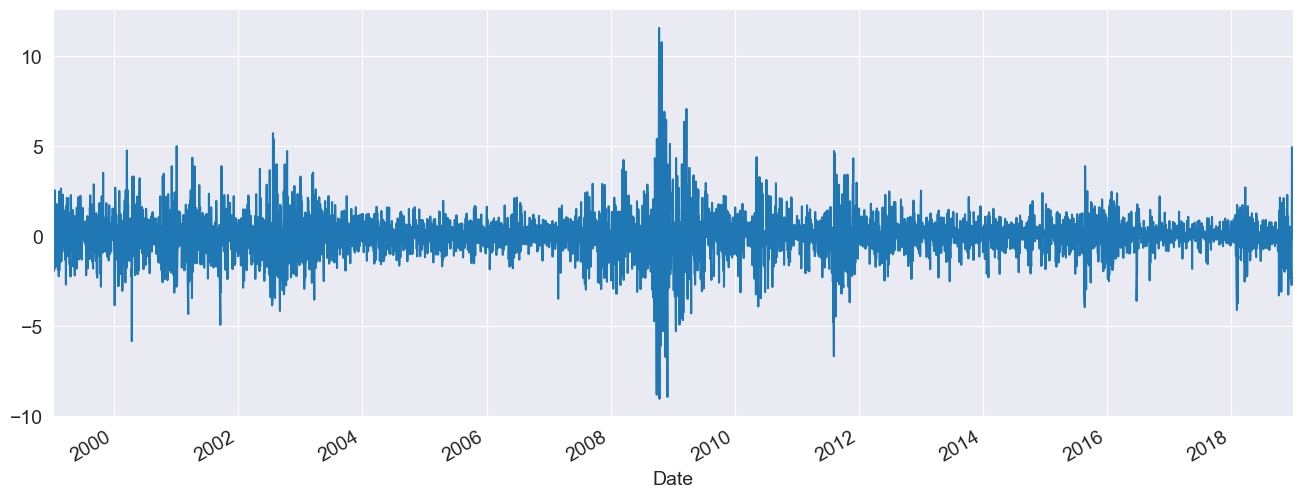

In [14]:
import datetime as dt

import arch.data.sp500

st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())

In [6]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2779565773335
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482076
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988951
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Thu, Feb 09 2023   Df Residuals:                     5029
Time:         

<AxesSubplot:xlabel='Date'>

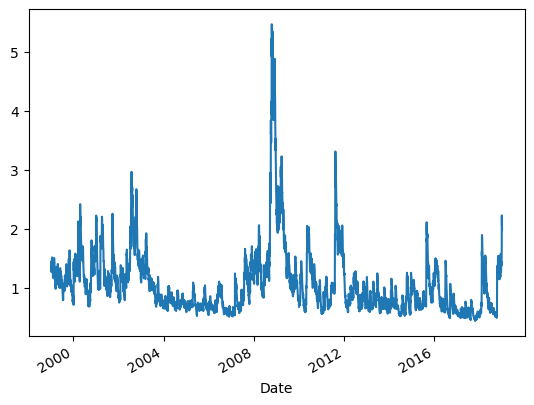

In [8]:
res.conditional_volatility.plot(fig)

plot() can be used to quickly visualize the standardized residuals and conditional volatility.

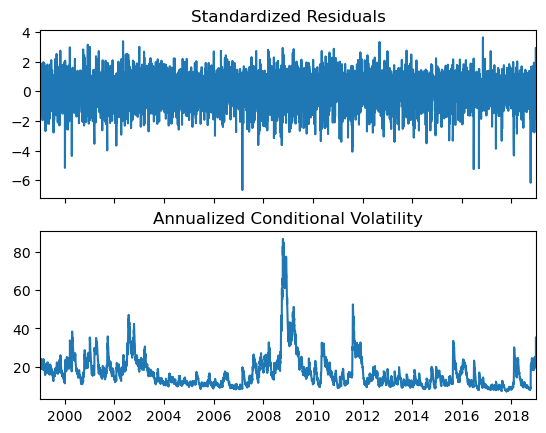

In [12]:
fig = res.plot(annualize="D")

## 参考
链接：https://bashtage.github.io/arch/univariate/univariate_volatility_modeling.html